# Week6 - Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

In [2]:
# insert code here
actualdistribution = results['actual'].value_counts()
print(actualdistribution)

actual
1.0    3000
0.0    2000
Name: count, dtype: int64


In [3]:
truevaluecount = (results['actual'] == 1).sum()
falsevaluecount = (results['actual'] == 0).sum()
calculatedimbalance = max(truevaluecount, falsevaluecount) / min(truevaluecount, falsevaluecount)
print("The data imbalance ratio was :" , calculatedimbalance)

The data imbalance ratio was : 1.5


Observations:

1) I have observed that when we want to calculate an event whether it was true or not and the 1.0 value has 3000 and 0.0 value has 2000 and here 1 indicates true and 0 indicates false.

2) The 1.0 value has more values when compared to 0.0 to calculate the data is imbalanced i have seperated the values while storing i have made a imbance count with that we can able to predict whether its balanced or imbalanced.

3) I have observed that the counts of 1s and 0s are different it says that the data is imabalanced it may leads to bias while predicting a model it may tells about the wrong predictions.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

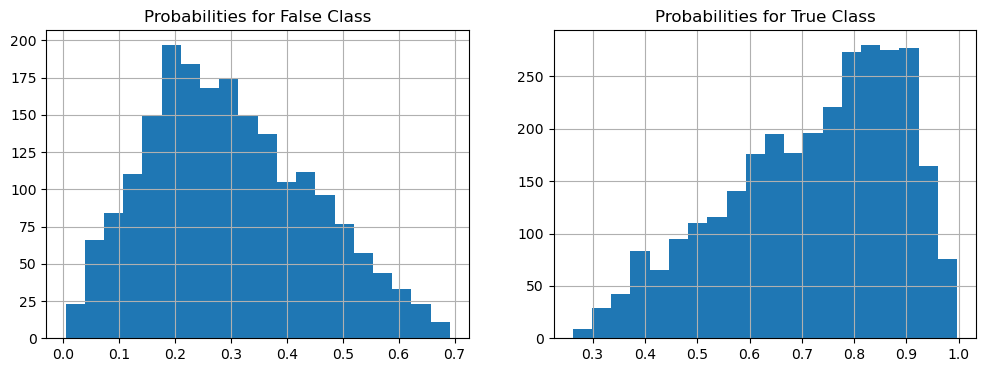

In [4]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
results[results['actual'] == 0]['prob'].hist(bins=20, alpha=1)
plt.title('Probabilities for False Class')

plt.subplot(1, 2, 2)
results[results['actual'] == 1]['prob'].hist(bins=20, alpha=1)
plt.title('Probabilities for True Class')
plt.show()

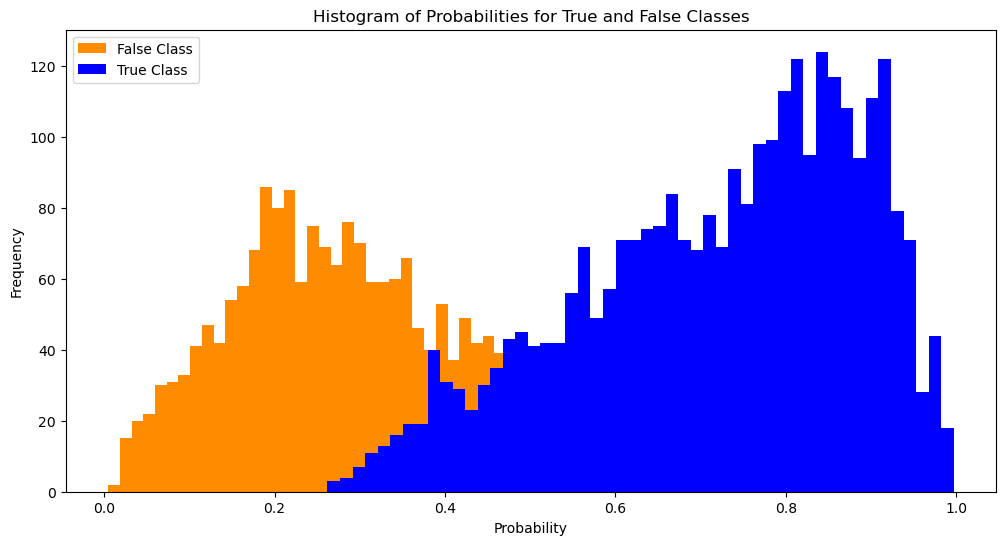

In [5]:
plt.figure(figsize=(12, 6))
false_probs = results.loc[results['actual'] == 0, 'prob']
plt.hist(false_probs, bins=50, alpha=1, color='darkorange', label='False Class')
true_probs = results.loc[results['actual'] == 1, 'prob']
plt.hist(true_probs, bins=50, alpha=1, color='blue', label='True Class')
plt.legend()
plt.title('Histogram of Probabilities for True and False Classes')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()


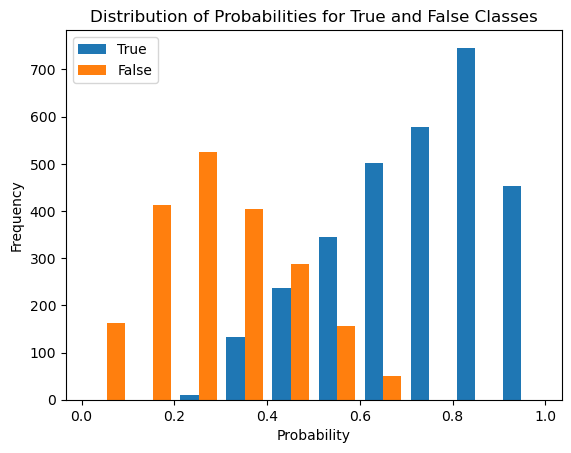

In [6]:
plt.hist([results[results['actual'] == 1.0]['prob'], results[results['actual'] == 0.0]['prob']], label=['True', 'False'])
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Probabilities for True and False Classes')
plt.legend()
plt.show()

Observations:

Creating two sublots to show the difference between by seperating true and false probabilities by showing visualizations of a different classes to make things clear

In the second visualizations we can see there is a probability mix of true and false but there is an overlap to show the overlap I have used 3rd visualization

Then we are looking for a model efficiency based on the true probability and false probability and here i have observed that some of the probabailities between 0.2 to 0.6 there is a common values are there.



## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [7]:
value_predictions = results['prob'] >= 0.5
confusion_matrix = pd.crosstab(results['actual'], value_predictions)
print(confusion_matrix)

prob    False  True 
actual              
0.0      1790    210
1.0       377   2623


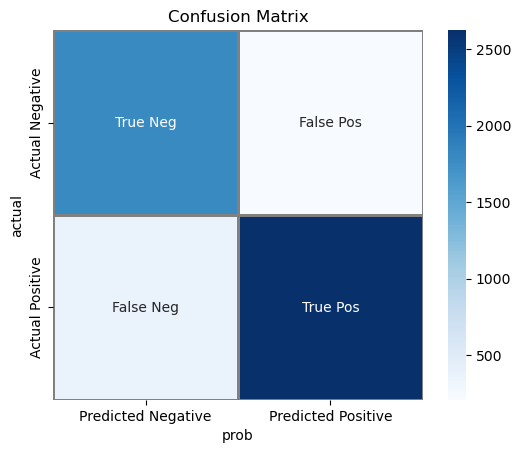

In [8]:
import seaborn as sns
import numpy as np
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues',
            linewidths=1, linecolor='gray', cbar=True,
            square=True, xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

<Axes: xlabel='prob', ylabel='actual'>

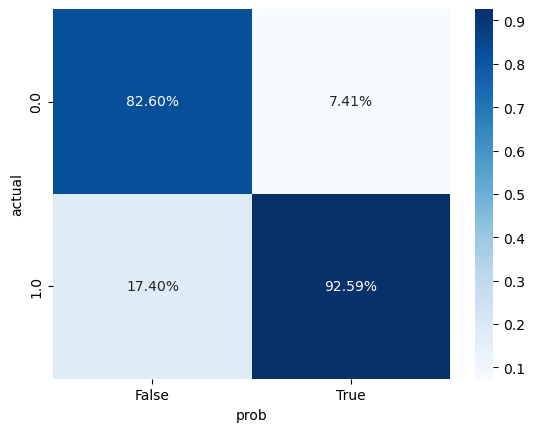

In [9]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True,
            fmt='.2%', cmap='Blues')

Observations:

Here in this confusion matrix we know that we have a threshold value is 0.5 for true and false provbability then only the model will be accurate when the values are less than 0.5 it says negative class and greater than 0.5 it shows positive class

With the help of confuson matrx we have:

1. True Negatives: 1790 instances
2. False Positives: 210 instances
3. False Negatives: 377 instances
4. True Positives : 2623 instances

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [10]:
from sklearn.metrics import confusion_matrix
y_true = results['actual']
y_pred = (results['prob'] >= 0.5).astype(int)
truenegative, falsepositive, falsenegative, truepositive = confusion_matrix(y_true, y_pred).ravel()
total = truenegative + falsepositive + falsenegative + truepositive
accuracy = (truepositive + truenegative) / total
precision = truepositive / (truepositive + falsepositive) if (truepositive + falsepositive) != 0 else 0
recall = truepositive / (truepositive + falsenegative) if (truepositive + falsenegative) != 0 else 0
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

Accuracy: 0.883
Precision: 0.926
Recall: 0.874


In my case i would suggest precision is better when compared to accuracy and recall and when we are going to production most of them see the positive outcomes rather than negative outcomes and when going to the business. Then we have multiple features and to evalaute it takes a lot of time. In this case
Precision is a suitable metric when you care more about being right when assigning the positive class than detecting them all. The recall metric is the opposite.  

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

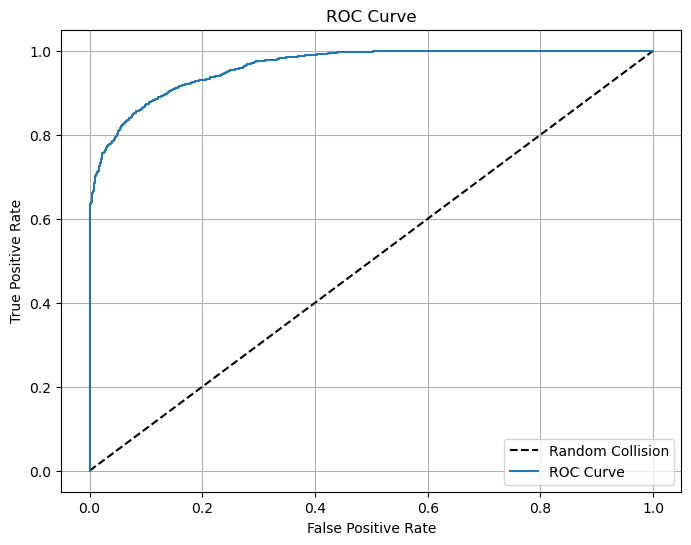

In [11]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_true, results['prob'])
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Collision')
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Here we know that the threshold value is 1 and the ROC Curve value meets at (1,1) and we know according to ROC principle from 0.4-0.9 the curve will be the same and the area covered below the line is called area Under the curve.This is used to evaluate the performance of a classification model. The higher the AUC, the better the model is at distinguishing between classes.